<center>
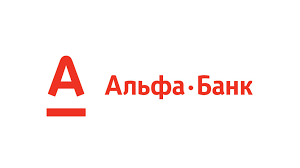
</center>

## Этап 1. Установка библиотек и импорт данных

In [ ]:
# скачиваем библиотеку PySpark для работы с данными
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=703f699907cf387100af08b5cdc197edd846b0cfeef17b6cdce7853f63267476
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import roc_auc_score
import os

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Создаем локальную сессию для работы

In [ ]:
spark = SparkSession.builder.master("local").appName("hackathon_spark").getOrCreate()

Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа банка"_, то необходимо поменять путь к директории и ссылки ниже

In [ ]:
# путь к папке с тренировочными данными
path_train = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 2/train'
# путь к папке с тестовыми данными
path_test = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 2/test'

Получим список файлов в каждой из папок с данными

In [ ]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_1.csv', 'train_10.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv', 'train_6.csv', 'train_7.csv', 'train_8.csv', 'train_9.csv']
Список файлов в репозитории test: ['test_1.csv', 'test_10.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv', 'test_6.csv', 'test_7.csv', 'test_8.csv', 'test_9.csv']


Объединим тестовые и тренировочные данные в единые датасеты test и train

In [ ]:
# объединим все части датасета train в единый файл
data_train = spark.read.csv(path_train+"/*.csv", header=True, inferSchema=True)

# вывоим первые 5 строчек тренировочных данных
data_train.show(5)

# удостоверимся, что перед нами данные только из выборки train
data_train.select('smpl').distinct().show()

+------+-----+---+----------+-----------+-----------+------------+-----------+-----------+-----------+-----------+----------+-----------+-----------+----------+----------+-----------+----------+-----------+----------+----------+-------------+-----------+----------+----------+-----------+------------+-----------+-----------+----------+----------+-----------+------------+----------+-----------+----------+-----------+-----------+-----------+-----------+----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+----------+-----------+-------------+-----------+-----------+-----------+-----------+----------+-----------+-----------+----------+----------+----------+----------+----------+----------+-----------+----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+----------+----------+-----------+-----------+----------+-----------

In [ ]:
# объединим все части датасета test в единый файл
data_test = spark.read.csv(path_test+"/*.csv", header=True, inferSchema=True)

# вывоим первые 5 строчек тестовых данных
data_test.show(5)

# удостоверимся, что перед нами данные только из выборки train
data_test.select('smpl').distinct().show()

+----+-------+-----------+------------+----------+----------+-----------+-----------+-----------+-----------+-------------+-----------+----------+-----------+-----------+----------+------------+----------+----------+-----------+-----------+-----------+----------+----------+----------+------------+------------+-----------+----------+-----------+-----------+-----------+----------+----------+-----------+-----------+-----------+-----------+----------+----------+-----------+----------+-----------+-----------+----------+-----------+-----------+----------+----------+------------+-----------+------------+----------+----------+------------+-----------+-------------+------------+-----------+----------+-----------+----------+----------+-----------+-----------+----------+-----------+-----------+-----------+----------+----------+-----------+-----------+------------+-----------+----------+------------+-----------+------------+-----------+------------+----------+-----------+------------+----------+--

## Этап 2. Работа с моделью

In [ ]:
# подготавливаем данные для обучения
data_train = data_train.drop('smpl')

# определяем целевой признак
label_column = 'target'

# получаем данные для обучения "X" в test
feature_columns = data_train.columns
feature_columns.remove(label_column)

# векторизуем признаки для обучения
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# преобразуем тренировочные данные
df_with_features = assembler.transform(data_train)
data_train = df_with_features.select("features", label_column)

# инициализируем модель классификации на градиентном бустинге
gbt = GBTClassifier(labelCol=label_column, featuresCol="features", maxIter=10)

# обучаем модель на тренировочных данных
gbt_model = gbt.fit(data_train)

In [ ]:
# инициализируем модель классификации на градиентном бустинге
gbt = GBTClassifier(labelCol=label_column, featuresCol="features", maxIter=10)

# обучаем модель на тренировочных данных
gbt_model = gbt.fit(data_train)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

## Этап 3. Предсказание для тестовых данных

In [ ]:
# подготавливаем данные для предсказания
data_test = data_test.drop('smpl')

# получаем данные для обучения "X" в test
feature_columns = data_test.columns

# Используйте VectorAssembler для объединения признаков в единый вектор
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# преобразуем тестовые данные
df_with_features = assembler.transform(data_test)
data_test = df_with_features.select("features")

In [ ]:
# Применение модели на тестовой выборке
predictions = gbt_model.transform(data_test)

# Просмотр предсказаний
predictions.select("prediction").show(truncate=False)

+----------+
|prediction|
+----------+
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
|0.0       |
+----------+
only showing top 20 rows



In [ ]:
# Определяем UDF для извлечения первого элемента из вектора
def get_first_feature(v):
    return float(v[0]) if v is not None else None

# Преобразуем Python-функцию в PySpark UDF
get_first_feature_udf = F.udf(get_first_feature, DoubleType())

In [ ]:
# Добавляем столбец с первым признаком в DataFrame
predictions_with_first_feature = predictions.withColumn("id", get_first_feature_udf(F.col("features")))

# Преобразование столбца "feature" в целочисленный тип данных
predictions_with_first_feature = predictions_with_first_feature.withColumn("id", F.col("id").cast(IntegerType()))

# Просмотр данных
predictions_with_first_feature.df.withColumnRenamed.select("id", "prediction").show(truncate=False)

+-------+----------+
|id     |prediction|
+-------+----------+
|4490468|0.0       |
|4490469|0.0       |
|4490470|0.0       |
|4490471|0.0       |
|4490472|0.0       |
|4490473|0.0       |
|4490474|0.0       |
|4490475|0.0       |
|4490476|0.0       |
|4490477|0.0       |
|4490478|0.0       |
|4490479|0.0       |
|4490480|0.0       |
|4490481|0.0       |
|4490482|0.0       |
|4490483|0.0       |
|4490484|0.0       |
|4490485|0.0       |
|4490486|0.0       |
|4490487|0.0       |
+-------+----------+
only showing top 20 rows



Получение предсказания

In [ ]:
(predictions_with_first_feature
 .withColumnRenamed("prediction", "target")
 .select("id", "target")
 .coalesce(1)
 .write.csv("submission.csv", header=True, mode="overwrite")
)